In [1]:
using Plots
import SimulatedAnnealing: AbstractState, move!, energy, Parameters, optimize, cooling_schedule
import Distributions: Normal

In [2]:
# define a concrete state
mutable struct State <: AbstractState
    value::Number
    σ::Number
    State(value::Number) = new(value, 0.01)
    State(value::Number, σ::Number) = new(value, σ)
end

# define how we move
function move!(state::State)
    dist = Normal(0, state.σ)
    ϵ = rand(dist)
    state.value += ϵ
end

# define how we compute the energy
function energy(x::Number)
    return x^2 + 100sin(x)
end

function energy(state::State)
    x = state.value
    return energy(x)
end

# setup the initial state
state = State(100, 10)

# setup the optimization params
params = Parameters(10_000, 100, 100, .1)

Parameters(10000, 100, 100.0, 0.1)

In [3]:
result, history = optimize(state, params);

| ---------- | ----------- | ---------- | ----------- |
|       step | temperature |     energy | best energy |
| ---------- | ----------- | ---------- | ----------- |
|          1 |         100 |    9559.68 |     9559.68 |
|        101 |          93 |      94.94 |      -94.78 |
|        201 |          87 |      80.22 |      -94.78 |
|        301 |          81 |     -32.97 |      -97.50 |
|        401 |          76 |     -78.18 |      -97.50 |
|        501 |          71 |     -32.50 |      -97.50 |
|        601 |          66 |     -90.00 |      -97.50 |
|        701 |          62 |      -0.08 |      -97.50 |
|        801 |          58 |     -65.64 |      -97.50 |
|        901 |          54 |     -76.88 |      -97.50 |
|       1001 |          50 |     -76.81 |      -97.50 |
|       1101 |          47 |     -69.68 |      -97.50 |
|       1201 |          44 |     -93.09 |      -97.50 |
|       1301 |          41 |     -19.03 |      -97.55 |
|       1401 |          38 |     -92.22 |      -

In [4]:
energy_history = [iteration.Energy for iteration in history];
best_energy_history = [iteration.BestEnergy for iteration in history];

In [5]:
plotattr(:Plot)

Defined Plot attributes are:
background_color, background_color_outside, display_type, dpi, extra_kwargs, extra_plot_kwargs, fontfamily, foreground_color, html_output_format, inset_subplots, layout, link, overwrite_figure, plot_title, plot_titlefontcolor, plot_titlefontfamily, plot_titlefonthalign, plot_titlefontrotation, plot_titlefontsize, plot_titlefontvalign, plot_titleindex, plot_titlelocation, plot_titlevspan, pos, show, size, tex_output_standalone, thickness_scaling, warn_on_unsupported, window_title


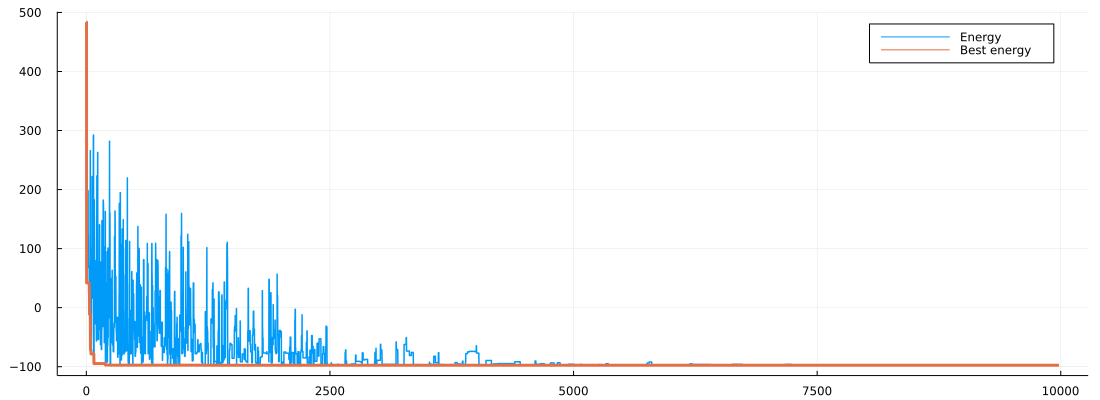

In [8]:
burnout_phase = 20
this_energy_history = energy_history[burnout_phase:end]
this_best_energy_history = best_energy_history[burnout_phase:end]

x = range(1, length(this_energy_history))
plot(x, this_energy_history, size=(1100, 400), lw=1.5, label="Energy")
plot!(x, this_best_energy_history, lw=3, label="Best energy")

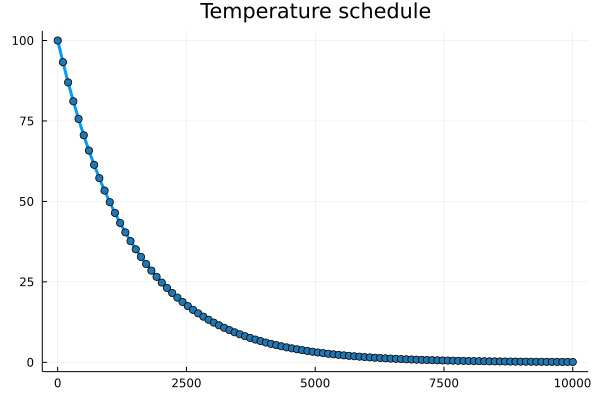

In [58]:
temp_func = cooling_schedule(params)

x = range(1, 10_000, length=100)
y = map(temp_func, x)
plot(x, y, lw=3, title="Temperature schedule", label="")
scatter!(x, y, c=palette(:tab10)[1], label="")

In [17]:
function optimization_path(state_value, state_energy, step)
    x = range(-20, 20, length=100)
    y = energy.(x)
    plot(x, y, title="Step: $step", label="Energy function")
    scatter!([state_value], [state_energy], label="Current state")
end

optimization_path (generic function with 1 method)

In [36]:
anim = @animate for iteration in vcat(history[1:50:9000], history[9001:20:end])
    optimization_path(iteration.State.value, iteration.Energy, iteration.Step)
end;

Plots.AnimatedGif("/Users/limabruno/Library/CloudStorage/OneDrive-TheBostonConsultingGroup,Inc/0. Work/SimulatedAnnealing/notebooks/tmp.gif")
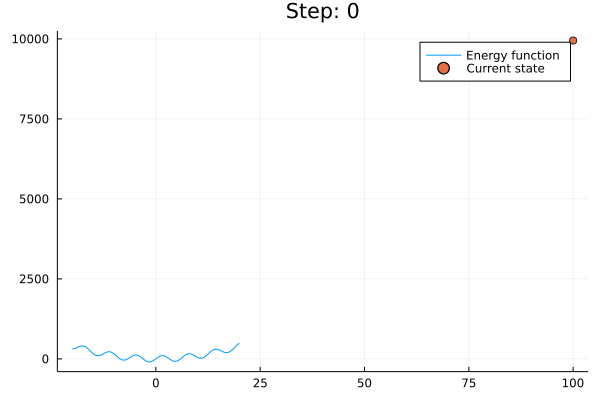

In [37]:
gif(anim, fps=15, loop=-1, show_msg=false)